In [162]:
from sklearn.ensemble import RandomForestClassifier #para implementar el random forest
import numpy as np
import pandas
from sklearn import cross_validation

data = pandas.read_csv('./NO_C_2017.csv')
data1 = pandas.read_csv('./A.csv')
data2 = pandas.read_csv('./B.csv')
data3 = pandas.read_csv('./C.csv')
data4 = pandas.read_csv('./D.csv')

In [163]:
#unir 
datos = pandas.concat([data, data1, data2, data3, data4])

#mesclar los datos
datos = datos.sample(frac = 1)
datos = datos.sample(frac = 1)
datos = datos.sample(frac = 1)


In [164]:
"""
"id","profesion","actividad","est_civil","sexo_desc","tipo_nacionalidad","edad","estrato","ind_defuncion",
"ind_interd","n_direccion","comuna","ind_region_rm","avaluo_bbrr","cant_bbrr","avaluo_auto","cant_autos",
"n_actividad","n_rubros","clean2","tot_docs","tot_mont","ind_morosidad1","ind_morosidad2","ind_consultas_id",
"status_salud_publica","tramo_salud_publico","cant_personas_fam","cant_vivos_fam","cant_hijos_fam","longitud",
"latitud","periodo"
"""

'\n"id","profesion","actividad","est_civil","sexo_desc","tipo_nacionalidad","edad","estrato","ind_defuncion",\n"ind_interd","n_direccion","comuna","ind_region_rm","avaluo_bbrr","cant_bbrr","avaluo_auto","cant_autos",\n"n_actividad","n_rubros","clean2","tot_docs","tot_mont","ind_morosidad1","ind_morosidad2","ind_consultas_id",\n"status_salud_publica","tramo_salud_publico","cant_personas_fam","cant_vivos_fam","cant_hijos_fam","longitud",\n"latitud","periodo"\n'

In [165]:
print(len(datos.loc[datos["est_civil"] == " "]))
print(len(datos.loc[datos["est_civil"] == "CASADO"]))
print(len(datos.loc[datos["est_civil"] == "SOLTERO"]))
print(len(datos.loc[(datos["est_civil"] == " ") & (datos["cant_hijos_fam"] == 0)]))
print(len(datos.loc[(datos["est_civil"] == "CASADO") & (datos["cant_hijos_fam"] == 0)]))
print(len(datos.loc[(datos["est_civil"] == "SOLTERO") & (datos["cant_hijos_fam"] == 0)]))
#con esto llegamos al criterio siguiente
#si no se conoce su estado civil y no tiene hijos sera soltero
#si no se conoce su estado civil y tiene hijos sera casado

datos.loc[((datos["est_civil"] == " ") & (datos["cant_hijos_fam"] == 0)), "est_civil"] = "SOLTERO"
datos.loc[((datos["est_civil"] == " ") & (datos["cant_hijos_fam"] > 0)), "est_civil"] = "CASADO"
print(len(datos.loc[datos["est_civil"] == " "]))
print(len(datos.loc[datos["est_civil"] == "CASADO"]))
print(len(datos.loc[datos["est_civil"] == "SOLTERO"]))


39433
462095
351798
22568
97981
241358
0
478960
374366


In [166]:
datos = datos.reset_index(drop=True)

In [167]:
selectOpt = ["status_salud_publica","est_civil","sexo_desc","edad","estrato",
"ind_interd","comuna","ind_region_rm","avaluo_bbrr","cant_bbrr","avaluo_auto","cant_autos",
"n_actividad","n_rubros","clean2","tot_docs","tot_mont","ind_morosidad1","ind_morosidad2","ind_consultas_id",
"cant_personas_fam","cant_hijos_fam"]

In [168]:
#son pasados los estados a una variable binaria
datos.loc[datos["status_salud_publica"] == "S", "status_salud_publica"]= 1
datos.loc[datos["status_salud_publica"] == "N", "status_salud_publica"]= 0

#cambair sexo de la persona
datos.loc[datos["sexo_desc"] == "F", "sexo_desc"]= 0
datos.loc[datos["sexo_desc"] == "M", "sexo_desc"]= 1
datos.loc[datos["sexo_desc"] == "SI" , "sexo_desc"] = 0

#ind_interd
datos.loc[datos["ind_interd"] == " " , "ind_interd"] = 0
datos.loc[datos["ind_interd"] == "N" , "ind_interd"] = 0
datos.loc[datos["ind_interd"] == "S" , "ind_interd"] = 1

#gente de fuera de santiago agregar comuna
datos.loc[datos["est_civil"] == "SOLTERO", "est_civil"]= 0
datos.loc[datos["est_civil"] == "CASADO", "est_civil"]= 3
datos.loc[datos["est_civil"] == "VIUDO", "est_civil"]= 1
datos.loc[datos["est_civil"] == "DIVORCIADO", "est_civil"]= 2
datos.loc[datos["est_civil"] == "SEPARADO JUDICIALMENTE", "est_civil"]= 2

#son discretizados los estratos sociales
datos.loc[datos["estrato"] == "SIN CLASIFICACION", "estrato"]= 3
datos.loc[datos["estrato"] == "ABC1", "estrato"]= 5
datos.loc[datos["estrato"] == "C2", "estrato"]= 4
datos.loc[datos["estrato"] == "C3", "estrato"]= 3
datos.loc[datos["estrato"] == "D", "estrato"]= 2
datos.loc[datos["estrato"] == "E", "estrato"]= 1

#se indica que son columnas enteras
for name in selectOpt:
    print(name)
    datos[name] = datos[name].astype('int')

status_salud_publica
est_civil
sexo_desc
edad
estrato
ind_interd
comuna
ind_region_rm
avaluo_bbrr
cant_bbrr
avaluo_auto
cant_autos
n_actividad
n_rubros
clean2
tot_docs
tot_mont
ind_morosidad1
ind_morosidad2
ind_consultas_id
cant_personas_fam
cant_hijos_fam


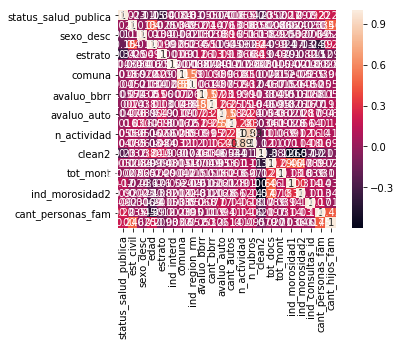

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

datos = datos.loc[:,selectOpt]
sns.heatmap(datos.corr(), square=True, annot=True)
plt.show()

In [170]:
#es posible notar una clara correlacion en el numero de actividades y numero de rubros
#quedandonos finalmente con numero de actividades
selectOpt = ["status_salud_publica","est_civil","sexo_desc","edad","estrato",
"ind_interd","comuna","ind_region_rm","avaluo_bbrr","cant_bbrr","avaluo_auto","cant_autos","n_rubros","clean2","tot_docs","tot_mont","ind_morosidad1","ind_morosidad2","ind_consultas_id",
"cant_personas_fam","cant_hijos_fam"]
datos = datos.loc[:,selectOpt]

In [171]:
import scipy
from scipy.stats import spearmanr

for name in selectOpt:
    print("%s: %f"%(name,spearmanr(datos[name],datos["status_salud_publica"])[0]))

status_salud_publica: 1.000000
est_civil: 0.020984
sexo_desc: -0.112879
edad: -0.131461
estrato: -0.368629
ind_interd: 0.000841
comuna: 0.154585
ind_region_rm: 0.010108
avaluo_bbrr: 0.037033
cant_bbrr: 0.051245
avaluo_auto: 0.017186
cant_autos: 0.014317
n_rubros: 0.047535
clean2: -0.234237
tot_docs: 0.147758
tot_mont: 0.138201
ind_morosidad1: 0.120510
ind_morosidad2: 0.091828
ind_consultas_id: 0.092183
cant_personas_fam: 0.229936
cant_hijos_fam: 0.231690


In [172]:
#se puede notar que las caracteristicas mas resaltantes corresponden a
"""
estrato: -0.368629
clean2: -0.234237
cant_personas_fam: 0.229936
cant_hijos_fam: 0.231690
"""
#que se espera aparezcan como caracteristicas importantes al aplicar random forest

'\nestrato: -0.368629\nclean2: -0.234237\ncant_personas_fam: 0.229936\ncant_hijos_fam: 0.231690\n'

In [173]:
model = RandomForestClassifier(n_estimators=300)
while(len(selectOpt) > 11):
    datos = datos.loc[:,selectOpt]
    modelo_entrenado = model.fit(datos.loc[:, selectOpt[1]:].values, datos['status_salud_publica'].values)
    features_importance = zip(modelo_entrenado.feature_importances_, selectOpt[1:len(selectOpt)])
    selectOpt = ['status_salud_publica']
    for importance, feature in sorted(features_importance, reverse=True):
        selectOpt.append(feature)
        print("%s: %f%%" % (feature, importance*100))
    print(selectOpt[len(selectOpt)-1])
    selectOpt.pop(len(selectOpt)-1)

edad: 26.364844%
comuna: 16.266168%
estrato: 12.453121%
avaluo_auto: 6.739311%
cant_personas_fam: 6.421640%
avaluo_bbrr: 6.081969%
cant_hijos_fam: 5.608794%
tot_mont: 2.814023%
n_rubros: 2.535046%
clean2: 2.290543%
cant_autos: 2.096624%
est_civil: 1.980860%
tot_docs: 1.915081%
sexo_desc: 1.683049%
ind_consultas_id: 1.477278%
cant_bbrr: 1.267982%
ind_region_rm: 1.249829%
ind_morosidad1: 0.419388%
ind_morosidad2: 0.328611%
ind_interd: 0.005841%
ind_interd
edad: 26.382812%
comuna: 16.531855%
estrato: 12.038248%
avaluo_auto: 6.740439%
cant_personas_fam: 6.445621%
avaluo_bbrr: 6.057955%
cant_hijos_fam: 5.640277%
tot_mont: 2.831275%
n_rubros: 2.558963%
clean2: 2.406992%
cant_autos: 2.100308%
est_civil: 1.982512%
tot_docs: 1.804945%
sexo_desc: 1.676523%
ind_consultas_id: 1.514764%
cant_bbrr: 1.291840%
ind_region_rm: 1.248071%
ind_morosidad1: 0.411617%
ind_morosidad2: 0.334982%
ind_morosidad2
edad: 26.785793%
comuna: 16.437930%
estrato: 12.044469%
avaluo_auto: 6.751008%
cant_personas_fam: 6.35

In [175]:
selectOpt = ['status_salud_publica',
 'edad',
 'comuna',
 'estrato',
 'avaluo_auto',
 'avaluo_bbrr',
 'cant_personas_fam',
 'cant_hijos_fam',
 'tot_mont',
 'clean2',
 'n_rubros']

In [177]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(100, ), random_state=1)

datos = datos.loc[:,selectOpt]

#Simple K-Fold cross validation. 10 folds.
cv = cross_validation.KFold(len(datos), n_folds=3)

vp = 0
vn = 0
fp = 0
fn = 0
it = 0

#se inicia la validacion cruzada
for traincv, testcv in cv:
    
    probas = clf.fit(datos.loc[traincv].loc[:, selectOpt[1]:].values, datos.loc[traincv]['status_salud_publica'].values).predict(datos.loc[testcv].loc[:, selectOpt[1]:].values)
    print "iteracion: %i"%(it)
    for i in range(len(testcv)):
        if(datos.loc[testcv[i]]['status_salud_publica'] == 0 and probas[i] == datos.loc[testcv[i]]['status_salud_publica']):
            vp+=1
        elif(datos.loc[testcv[i]]['status_salud_publica'] == 0 and probas[i] != datos.loc[testcv[i]]['status_salud_publica']):
            fp+=1
        elif(datos.loc[testcv[i]]['status_salud_publica'] == 1 and probas[i] == datos.loc[testcv[i]]['status_salud_publica']):
            vn+=1
        elif(datos.loc[testcv[i]]['status_salud_publica'] == 1 and probas[i] != datos.loc[testcv[i]]['status_salud_publica']):
            fn+=1
    it+=1

#son mostrados los resultados
print "Exactitud: ",(vp+vn)/float(vp+vn+fp+fn)
print "%i | %i"%(vp,fp)
print "%i | %i"%(fn,vn)


iteracion: 0
iteracion: 1
iteracion: 2
Exactitud:  0.558278309859
475138 | 24862
367166 | 20334


In [ ]:
listado.pop(21)